In [1]:
import random

import japanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib

import networkx as nx
from pyvis.network import Network

import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import itertools

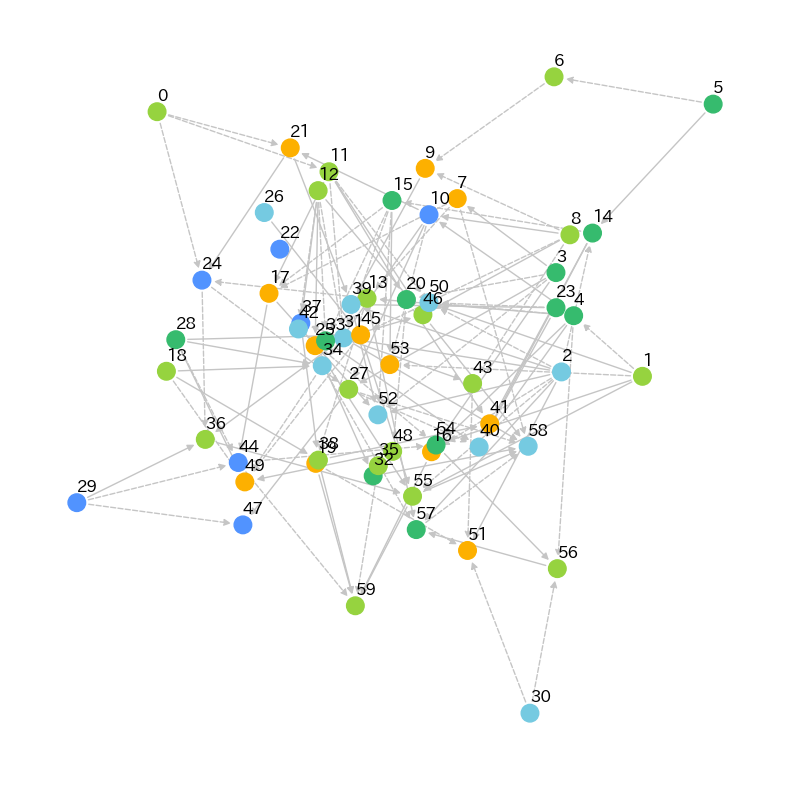

In [2]:
random.seed(42)
NODE_NUM = 60
EDGE_RATIO = 0.075

plt.figure(figsize=(8, 8))

# グラフの作成（有向グラフ）
G = nx.DiGraph()

# 色の設定
colors = [
    '#96D33F', '#36BB6E', '#75CAE1', '#5193FF', '#FDB000',# 三井化学
    # '#F0ABA1', '#F7DDEC', '#D0E6A1', '#AEC8DE', '#D1CFE3', '#B9DFD8', '#FEFDCF', # 共起ネットワークで検索していい感じの色
          ]
color_map = [random.choice(colors) for _ in range(NODE_NUM)]

# ノードの追加
nodes = list(range(NODE_NUM))
for i in nodes:
  G.add_node(i, label=f"node{i}", color=color_map[i])

# エッジの追加（ランダムにエッジを作成）
for i in range(0, NODE_NUM):
  for j in range(i+1, NODE_NUM):
    if random.random() < EDGE_RATIO:
      if random.random() < 0.5:
        G.add_edge(i, j, label=f"{i}->{j}", color='black', style='solid',)
      else:
        G.add_edge(i, j, label=f"{i}->{j}", color='black', style='dashed',)

# レイアウト
pos = nx.kamada_kawai_layout(G)

# ノード
node_colors = nx.get_node_attributes(G, 'color').values()
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=160)

# ノードラベル
# nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
for c in pos:
  plt.text(pos[c][0], pos[c][1] + 0.03, c, fontsize=12)

# エッジのスタイルと太さの設定
edges = G.edges()
solid_edges = [(u, v) for u, v, d in G.edges(data=True) if 'style' in d and d['style']=='solid']
dashed_edges = [(u, v) for u, v, d in G.edges(data=True) if 'style' in d and d['style']=='dashed']

nx.draw_networkx_edges(G, pos, edgelist=solid_edges, edge_color='#C5C5C5', style='solid', arrowstyle='-|>', arrowsize=10)
nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, edge_color='#C5C5C5', style='dashed', arrowstyle='-|>', arrowsize=10)

# エッジラベル
# edge_labels = nx.get_edge_attributes(G, 'label')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='black')

plt.axis("off")
plt.tight_layout()
plt.show()

In [3]:
nt = Network(
    height="1000px",
    width="1000px",
    directed=True,
    notebook=True,
    neighborhood_highlight=True, select_menu=True, filter_menu=True,
    cdn_resources='remote',
    )

nt.from_nx(G)

nt.force_atlas_2based()
nt.toggle_physics(True)

# nt.show_buttons()
nt.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 14
    }
  },
  "edges": {
    "arrows": {
      "to": {"scaleFactor": 0.35}
    },
    "font": {
      "size": 8
    },
    "smooth": {
      "enabled": false
    },
    "arrowStrikethrough": false
  }
}
""")


nt.show('nx_1.html',notebook=False)

nx_1.html


In [4]:
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network(
    height="1000px",
    width="1000px",
    directed=True,
    notebook=True,
                 neighborhood_highlight=True, select_menu=True, filter_menu=True,
    cdn_resources='remote',
    )
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show("nx.html",notebook=False)

nx.html


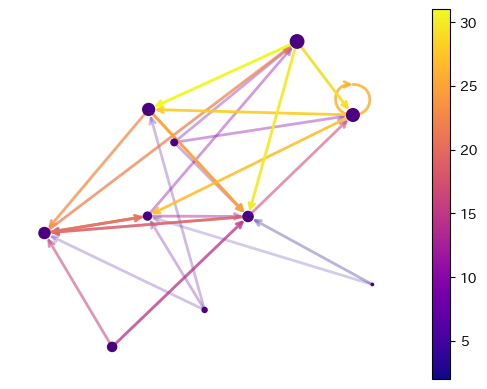

In [5]:
seed = 13648  # Seed random number generators for reproducibility
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = matplotlib.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()

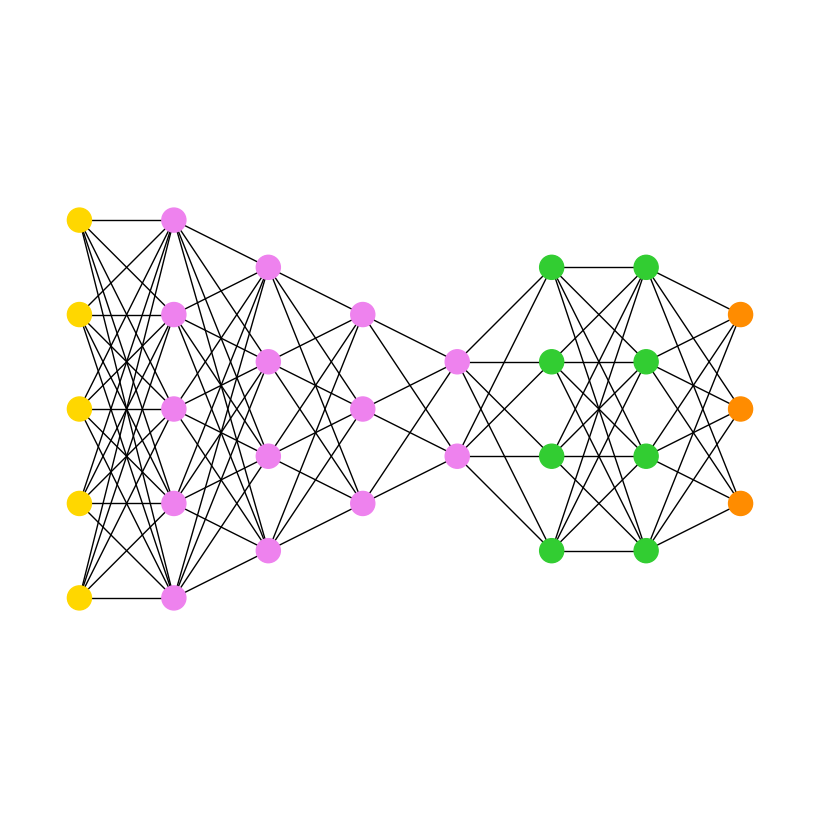

In [6]:
subset_sizes = [5, 5, 4, 3, 2, 4, 4, 3]
subset_color = [
    "gold",
    "violet",
    "violet",
    "violet",
    "violet",
    "limegreen",
    "limegreen",
    "darkorange",
]


def multilayered_graph(*subset_sizes):
    extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for i, layer in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in nx.utils.pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G


G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_color=color, with_labels=False)
plt.axis("equal")
plt.show()


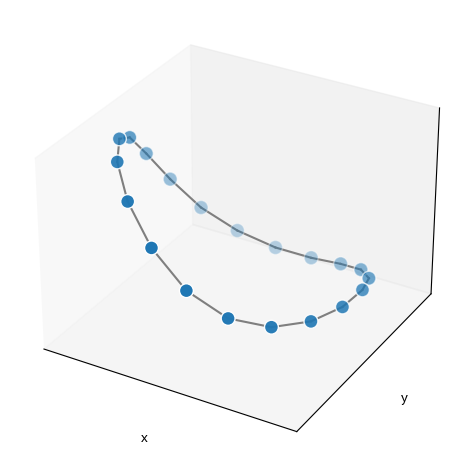

In [7]:
# The graph to visualize
G = nx.cycle_graph(20)

# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=779)
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()


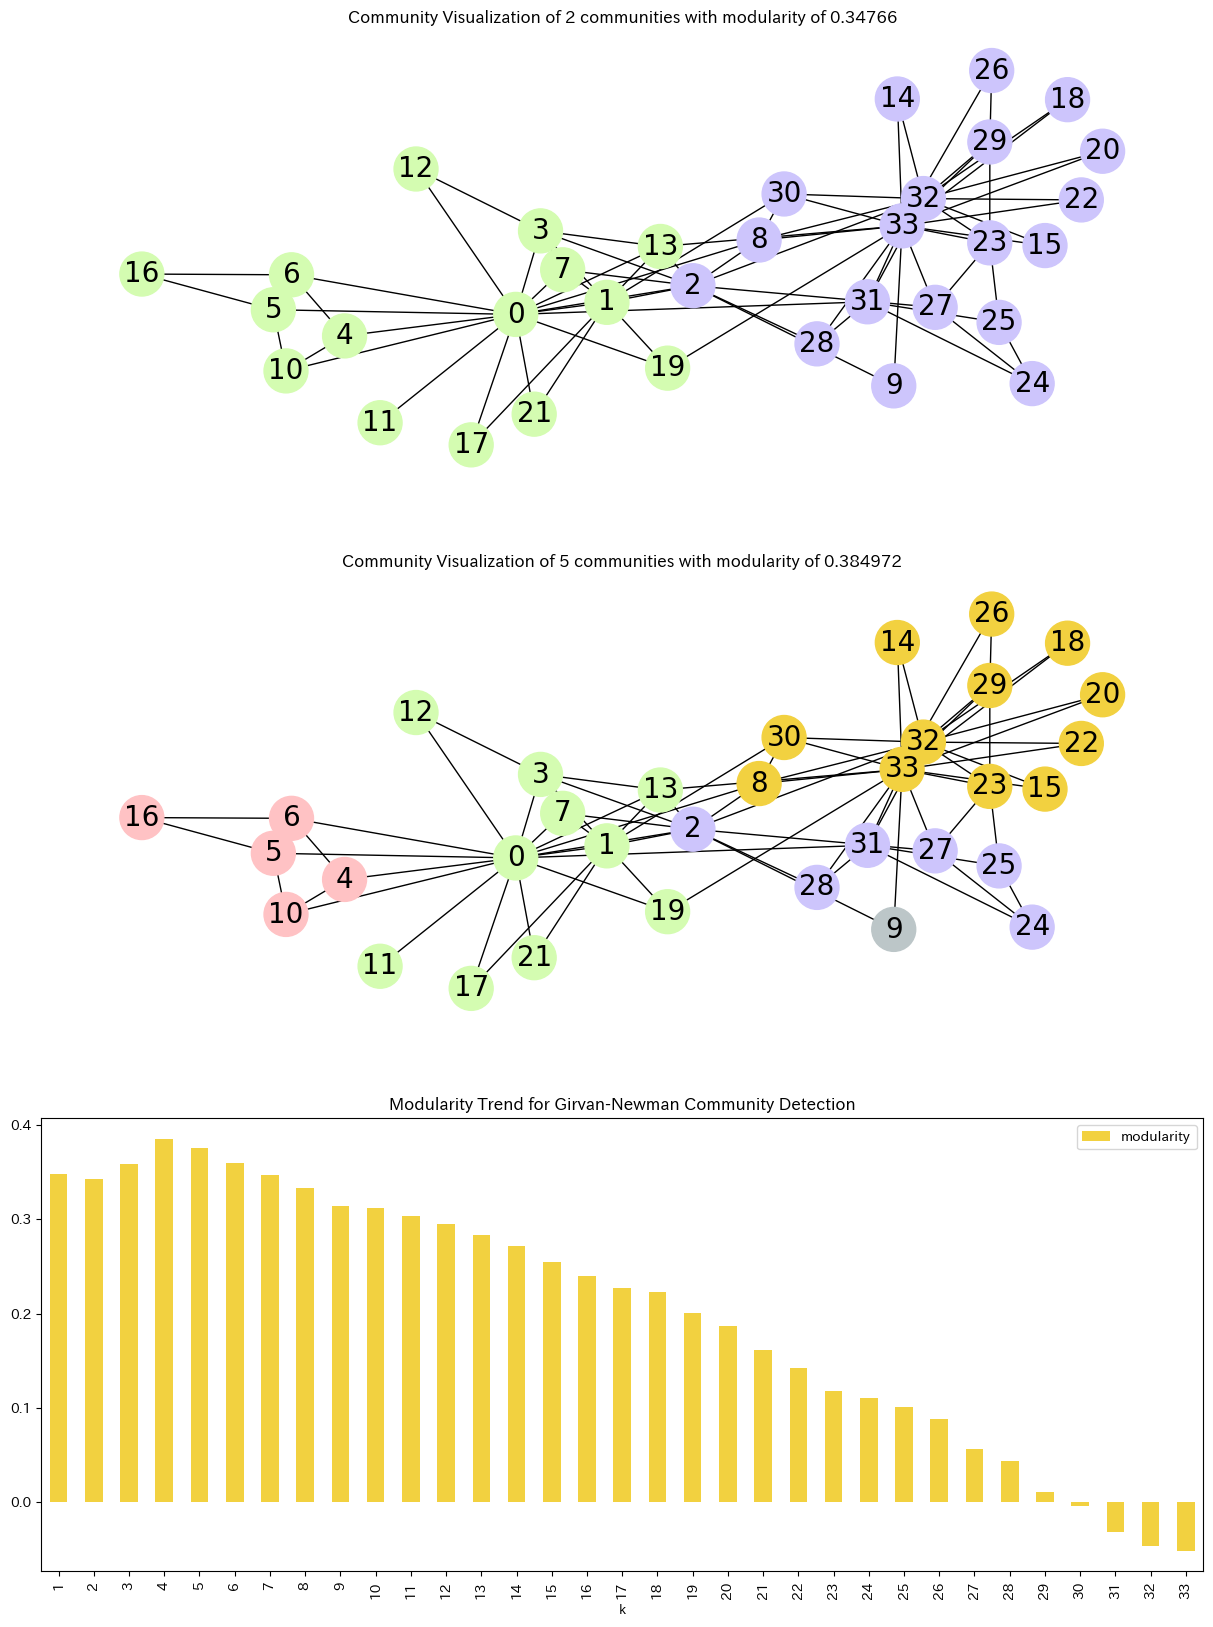

In [8]:
# Load karate graph and find communities using Girvan-Newman
G = nx.karate_club_graph()
communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()